## Training PyTorch Autoencoder model ##
This notebook uses pipeline to train PyTorch AE model and test it on test dataset.

In [1]:
import time
import random
import math
import logging
import numpy as np
import pandas as pd
import os

import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from torchvision import transforms, datasets, models
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.dataset import random_split

In [2]:
print(os.getcwd())
fname = "data/gt-weekly.zip"
dscol = 'time'
ycols = ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10']

/Users/preh0405/Desktop/chronos+/notebook


## Pipeline of training

In [3]:
from modeling.pytorch_ae import TrainPytorchAE
from preprocessing.preprocessor import LeftPad
from preprocessing.preprocessor import LoadData, FindFrequency, PeriodDetect, AlignData, DropExtrema, Normalizer, FillGap, GenerateInput
from pipeline import Pipeline

training_list = [
    LoadData(fname, dscol, ycols),
    FindFrequency(),
    PeriodDetect(),
    AlignData(),
    DropExtrema(),
    Normalizer(),
    FillGap(),
    GenerateInput(),
    TrainPytorchAE(batch_size=32, lr=1e-05, epochs=1000, tolerence=4)
]
training_pipeline = Pipeline()
training_pipeline.fit_transform(training_list)

Using TensorFlow backend.
/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

/Users/preh0405/Desktop/chronos+/notebook


Finding frequency:   0%|          | 0/2 [00:00<?, ?it/s]

Detecting Period:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Aligning data:   0%|          | 0/2 [00:00<?, ?it/s]

(35279, 10)
(31679, 10)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint'])


Dropping Extrema:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Filling gap:   0%|          | 0/2 [00:00<?, ?it/s]

ok10
ok20
ok11
ok21
(35279, 11)
(31679, 11)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])


Generating Input:   0%|          | 0/2 [00:00<?, ?it/s]

(48, 7200)
(43, 7200)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
720
epoch number:0 train_loss: 0.029712624847888947 val_loss: 0.014311168269162617
epoch number:0 train_loss: 0.032452795654535294 val_loss: 0.01609770514051012
720


## Testing using pipeline ##

In [4]:
test_seq_2 = training_pipeline.prediction('data/210129-210204_weekly.csv')

成功移植


Finding frequency:   0%|          | 0/2 [00:00<?, ?it/s]

Aligning data:   0%|          | 0/2 [00:00<?, ?it/s]

(5039, 10)
(1439, 10)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])


Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filling gap:   0%|          | 0/2 [00:00<?, ?it/s]

ok10
ok20
ok11
ok21
(5758, 11)
(2158, 11)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
成功移植


Finding frequency:   0%|          | 0/2 [00:00<?, ?it/s]

Aligning data:   0%|          | 0/2 [00:00<?, ?it/s]

(5039, 10)
(1439, 10)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])


Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

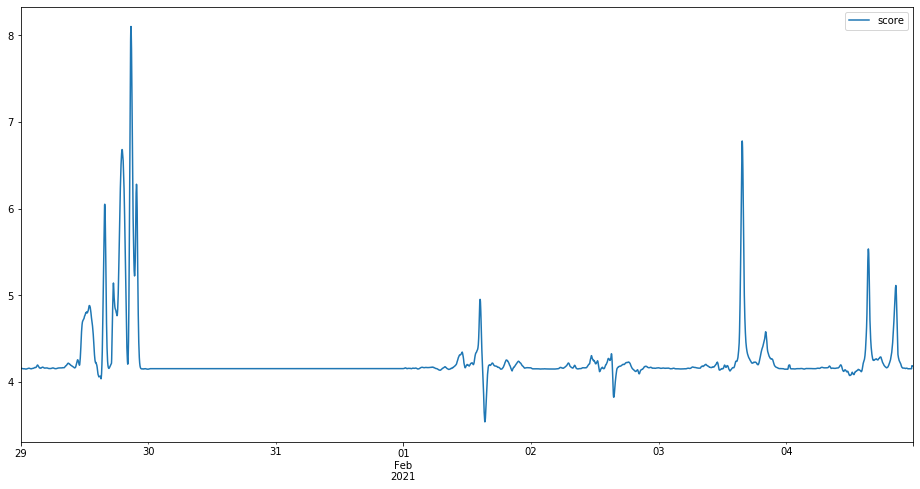

In [5]:
test_seq_2[0][['score']].plot(figsize=[16,8])

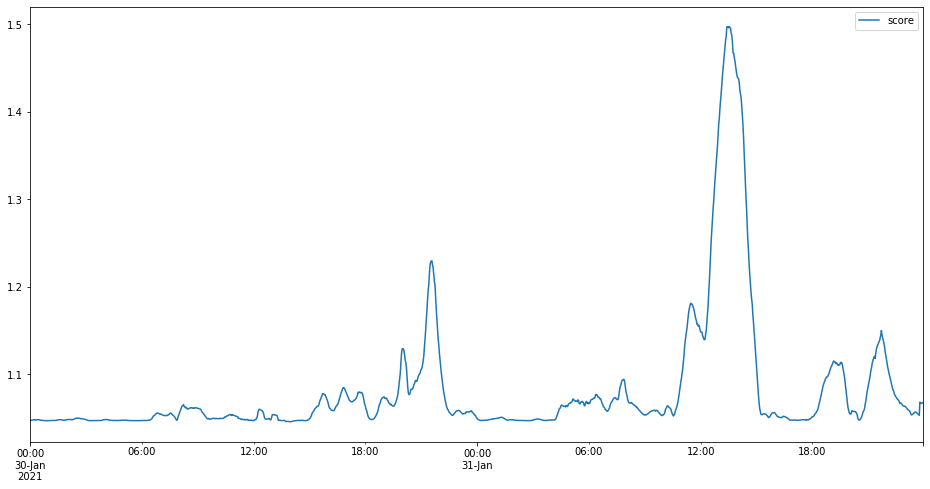

In [6]:
test_seq_2[1][['score']].plot(figsize=[16,8])